In [4]:
import pandas as pd
import requests
import os

In [60]:
import pandas as pd
import numpy as np
# Módulo para trabajar con rutas de archivo
from pathlib import Path
# Librería para identificar encondings
import chardet
#importamos lalibreria os para trabajar con los archivos
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#funcion para leer archivos csv y json a partir de una ruta
def get_data(filepath):
    #manejando los archivos csv y json
    with open(filepath, 'rb') as file:
        result = chardet.detect(file.read())
        # Para importar archivos csv, detectando encoding
        if Path(filepath).suffix == ".csv": 
            df = pd.read_csv(filepath, encoding=result['encoding'])
    return df

In [7]:
#funcionque nos da el nombres de los archivos a partir de la ruta del   archivo
def get_nombre_archivo(filepath):
    #leemos el contenido de la ruta 
    archivos = os.listdir(filepath)
    archivos_sin_extension = [os.path.splitext(nombre_archivo)[0] for nombre_archivo in archivos if os.path.splitext(nombre_archivo)[1] in ['.csv','.json'] ]
    return archivos_sin_extension

In [64]:
#creando  los data framees a partir de los nombres que nos dieron
i=1
directorio='./data/'

for nombre_archivo in get_nombre_archivo(directorio):
    locals()[nombre_archivo.replace('-','_')]=get_data(f'{directorio}{nombre_archivo}.csv')
    print(f'el nombre de tu variable {i} es :',nombre_archivo.replace('-','_'))
    i+=1

el nombre de tu variable 1 es : AccesosaInternetfijoportecnologiaylocalidad_2791751682006771915
el nombre de tu variable 2 es : AccesosaInternetfijoporvelocidadbajadayprovincia_2791741682006745495
el nombre de tu variable 3 es : AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171682006764486
el nombre de tu variable 4 es : ConectividadalserviciodeInternet_2776151682006239208
el nombre de tu variable 5 es : historico_velocidad_internet
el nombre de tu variable 6 es : Internet_Accesos_por_tecnologia
el nombre de tu variable 7 es : Internet_Accesos_por_velocidad
el nombre de tu variable 8 es : Internet_BAF
el nombre de tu variable 9 es : Internet_Ingresos
el nombre de tu variable 10 es : Internet_Penetracion
el nombre de tu variable 11 es : Listadodelocalidadesconconectividadainternet_2750221682006785583


In [15]:
Internet_Penetracion.dtypes

Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

In [25]:
Internet_Penetracion.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
835,2014,1,Santa Cruz,28.94
836,2014,1,Santa Fe,47.85
837,2014,1,Santiago Del Estero,16.31
838,2014,1,Tierra Del Fuego,63.97
839,2014,1,Tucumán,33.42


In [32]:
Internet_Penetracion['Accesos por cada 100 hogares'].apply(lambda x:x.replace('.',','))

0       78,11
1      122,28
2       65,33
3       43,86
4       84,38
        ...  
835     28,94
836     47,85
837     16,31
838     63,97
839     33,42
Name: Accesos por cada 100 hogares, Length: 840, dtype: object

In [34]:
Internet_Penetracion['Accesos por cada 100 hogares']=Internet_Penetracion['Accesos por cada 100 hogares'].astype(np.number)

c:\jhon\dataScience\boopcamp\proyecto_individual\DataAnalyst_02\venv_Analyst\Lib\site-packages\pandas\core\dtypes\common.py:1687: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [45]:
Internet_Penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [38]:
Internet_Penetracion.sort_values(by='Accesos por cada 100 hogares',ascending=  False)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
505,2017,2,Capital Federal,124.06
457,2017,4,Capital Federal,122.90
1,2022,3,Capital Federal,122.28
481,2017,3,Capital Federal,121.86
25,2022,2,Capital Federal,121.31
...,...,...,...,...
618,2016,2,San Luis,9.60
642,2016,1,San Luis,9.59
546,2017,1,San Luis,9.55
522,2017,2,San Luis,9.51


In [55]:
Internet_Penetracion.groupby(['Provincia'])['Accesos por cada 100 hogares']\
.mean().reset_index().sort_values(by='Accesos por cada 100 hogares')

,Provincia,Accesos por cada 100 hogares
8,Formosa,26.214857
21,Santiago Del Estero,32.150286
19,Santa Cruz,32.635143
17,San Juan,33.125143
3,Chaco,33.182857
13,Misiones,35.016857
5,Corrientes,35.139429
9,Jujuy,35.276000
2,Catamarca,35.908000
12,Mendoza,36.862286


Text(0.5, 1.0, 'PROVINCIA VS ACESO HA INTERNET POR 100 HOGARES')

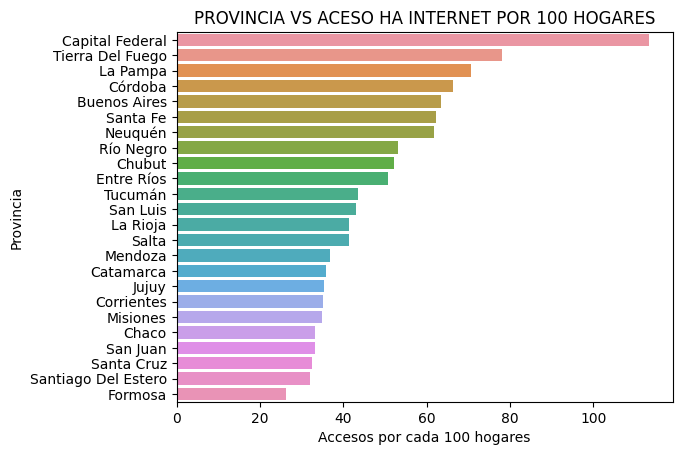

In [61]:
sns.barplot(data=Internet_Penetracion.groupby(['Provincia'])['Accesos por cada 100 hogares']\
            .mean().reset_index().sort_values(by='Accesos por cada 100 hogares',ascending=False),
            y='Provincia',
            x='Accesos por cada 100 hogares')
plt.title('PROVINCIA VS ACESO HA INTERNET POR 100 HOGARES')

In [70]:
Internet_Accesos_por_tecnologia

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021
5,2021,2,2.018.587,5.641.731,1.472.246,476.968,253.552,9.863.084,Abr-Jun 2021
6,2021,1,2.175.211,5.424.782,1.362.976,434.548,250.455,9.647.972,Ene-Mar 2021
7,2020,4,2.213.949,5.371.824,1.311.199,421.554,253.036,9.571.562,Oct-Dic 2020
8,2020,3,2.263.889,5.259.351,1.170.879,413.259,248.821,9.356.199,Jul-Sept 2020
9,2020,2,2.295.533,5.005.115,1.106.725,376.667,247.016,9.031.056,Abr-Jun 2020


In [ ]:
sns.lineplot()